# MAGIC + LST combined analysys: stereo parameter reconstruction

In [1]:
import yaml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import magicctapipe
from IPython.display import Image
print(f'magicctapipe version: {magicctapipe.__version__}')

magicctapipe version: 0.3.0


In [2]:
# --- display all columns --- 
pd.set_option('display.max_columns', None)

# --- customize plt figure ---
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linestyle'] = ':'

# --- get the default color cycle ---
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

The script for the stereo parameter reconstruction is <b>lst1_magic_stereo_reco.py<b>
    
This script processes DL1 events and reconstructs the geometrical stereo parameters with more than one telescope information. The quality cutsspecified in the configuration file are applied to the events before thereconstruction.When the input is real data containing LST-1 and MAGIC events, it checksthe angular distances of their pointing directions and excludes theevents taken with larger distances than the limit specified in theconfiguration file. This is in principle to avoid the reconstruction ofthe events taken in too-mispointing situations. For example, DL1 datamay contain the coincident events taken with different wobble offsets between the systems.If the `--magic-only` argument is given, it reconstructs the stereoparameters using only MAGIC events.

<img src="Stereo_tech.png" alt="Alternative text" />
    
<b>USAGE<b>:

python lst1_magic_stereo_reco.py
    
--input-file dl1_LST-1_MAGIC.Run03265.0040.h5
    
(--output-dir dl1_stereo)
    
(--config-file config.yaml)
    
(--magic-only)

# 1) Input data

In [3]:
date='20210213'

In [4]:
dl1_coincidence_dir='/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/coincidence'

In [5]:
input_file = f'{dl1_coincidence_dir}/{date}/dl1_LST-1_MAGIC.Run03631.0016.h5'

In [6]:
output_stereo_dir=f'/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/{date}'

In [7]:
config_file = './config_MAGIC_LST.yaml'

with open(config_file, 'rb') as f:
    config = yaml.safe_load(f)

In [8]:
config['stereo_reco']

{'quality_cuts': '(intensity > 50) & (width > 0)', 'theta_uplim': '6 arcmin'}

'theta_uplim':

    it's an upper limit on the pointing angular distance between the telescopes (6 arcmin=0.1 deg)

# 3) Running the script

Execute script from terminal:

In [9]:
!lst1_magic_stereo_reco\
--input-file $input_file\
--output-dir $output_stereo_dir\
--config-file $config_file


Input file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/coincidence/20210213/dl1_LST-1_MAGIC.Run03631.0016.h5

Is simulation: False

Telescope positions:
    1: <Quantity  -8.09 77.13  0.78  m>
    2: <Quantity   39.3  -62.55  -0.97  m>
    3: <Quantity  -31.21 -14.57   0.2   m> 

MAGIC-only analysis: False

Quality cuts: (intensity > 50) & (width > 0)

In total 1351 stereo events are found:
    M1_M2 (type 0): 288 events (21.3%)
    LST1_M1 (type 1): 75 events (5.6%)
    LST1_M2 (type 2): 183 events (13.5%)
    LST1_M1_M2 (type 3): 805 events (59.6%) 

Checking the angular distances of the LST-1 and MAGIC pointing directions...
--> All the events were taken with smaller angular distances than the limit 6.0 arcmin.

Reconstructing the stereo parameters...
0 events
100 events
200 events
300 events
400 events
500 events
600 events
700 events
800 events
900 events
1000 events
1100 events
1200 events
1300 events
1351 events

Output file: /home/gpirola/Desktop/M

Import function on a notebook:

In [10]:
from magicctapipe.scripts.lst1_magic import lst1_magic_stereo_reco

In [11]:
lst1_magic_stereo_reco.stereo_reconstruction(input_file, output_stereo_dir, config)


Input file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/coincidence/20210213/dl1_LST-1_MAGIC.Run03631.0016.h5

Is simulation: False

Telescope positions:
    1: <Quantity  -8.09 77.13  0.78  m>
    2: <Quantity   39.3  -62.55  -0.97  m>
    3: <Quantity  -31.21 -14.57   0.2   m> 

MAGIC-only analysis: False

Quality cuts: (intensity > 50) & (width > 0)

In total 1351 stereo events are found:
    M1_M2 (type 0): 288 events (21.3%)
    LST1_M1 (type 1): 75 events (5.6%)
    LST1_M2 (type 2): 183 events (13.5%)
    LST1_M1_M2 (type 3): 805 events (59.6%) 

Checking the angular distances of the LST-1 and MAGIC pointing directions...
--> All the events were taken with smaller angular distances than the limit 6.0 arcmin.

Reconstructing the stereo parameters...
0 events
100 events
200 events
300 events
400 events
500 events
600 events
700 events
800 events
900 events
1000 events
1100 events
1200 events
1300 events
1351 events

Output file: /home/gpirola/Desktop/M

# 4) Check the output data

In [12]:
output_file=f'{output_stereo_dir}/dl1_stereo_LST-1_MAGIC.Run03631.0016.h5'

In [13]:
data = pd.read_hdf(output_file, key='events/parameters')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [14]:
data.head(10)

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
3631   848003   1            5094483          132558      3631.0   
                2            5094483          132558      3631.0   
                3            5094483          132558      3631.0   
       848012   1            5094483          132559      3631.0   
                2            5094483          132559      3631.0   
                3            5094483          132559      3631.0   
       848096   1            5094483          132561      3631.0   
                2            5094483          132561      3631.0   
                3            5094483          132561      3631.0   
       848153   1            5094483          132562      3631.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
3631   848003   1           848003.0  1437.954999  0.945760 -0.276209   
                2           848003.0   466.333333  0.265849 -0.080115   
                3           848003.0   276.473958  0.458422 -0.020844   
       848012   1           848012.0   674.572459  0.756910 -0.190546   
                2           848012.0   151.164062  0.055590  0.020217   
                3           848012.0   180.453125  0.384190 -0.018620   
       848096   1           848096.0  9503.230712  0.200374  0.457226   
                2           848096.0   719.788932 -0.139309  0.236160   
                3           848096.0  1428.942708 -0.021469  0.316943   
       848153   1           848153.0   975.723421  0.585292 -0.326834   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
3631   848003   1       0.985269  -16.280407  0.121087            0.005277   
                2       0.277658  -16.770394  0.047560            0.001337   
                3       0.458895   -2.603354  0.072674            0.003659   
       848012   1       0.780526  -14.130130  0.129637            0.004183   
                2       0.059152   19.984863  0.140118            0.008213   
                3       0.384641   -2.774746  0.111705            0.002590   
       848096   1       0.499205   66.335163  0.286030            0.004500   
                2       0.274187  120.536095  0.129240            0.003050   
                3       0.317669   93.875250  0.152175            0.003349   
       848153   1       0.670363  -29.179538  0.203909            0.007698   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
3631   848003   1       0.090414           0.002839  60.930590 -0.999436   
                2       0.036176           0.001149 -36.389869  0.146658   
                3       0.022571           0.001030  48.298957 -1.326338   
       848012   1       0.060414           0.004041 -73.318768 -0.245304   
                2       0.024162           0.001125  -2.080430  1.389882   
                3       0.023508           0.001226  61.691111 -0.162827   
       848096   1       0.148532           0.001995 -44.577092 -0.559510   
                2       0.084228           0.001662 -71.059922  0.819300   
                3       0.104940           0.002012 -87.460358  1.317984   
       848153   1       0.118258           0.003870 -35.047506 -0.629849   

                        kurtosis      slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                      
3631   848003   1       3.608887  -0.230712  23.277065           0.240693   
                2       2.473870   5.036655  16.356182           0.000000   
                3       3.803304  -0.760304  14.207277           0.516851   
       848012   1       1.670968  -1.121698  21.778029           0.000000   
                2 

# 5) Merge the subrub files

The script for merging hdf file is <b>merge_hdf_files.py<b>


This script merges the HDF files produced by the LST-1 + MAGIC combined
analysis pipeline. It parses information from the file names, so they
should follow the convention, i.e., *Run*.*.h5 or *run*.h5.
If no output directory is specified with the `--output-dir` argument,
it saves merged files in the `merged` directory which will be created
under the input directory.
If the `--run-wise` argument is given, it merges input files run-wise.
It is applicable only to real data since MC data are already produced
run-wise. The `--subrun-wise` argument can be also used to merge MAGIC
DL1 real data subrun-wise (for example, dl1_M1.Run05093711.001.h5
+ dl1_M2.Run05093711.001.h5 -> dl1_MAGIC.Run05093711.001.h5).

<b>Usage<b>:
$ python merge_hdf_files.py

--input-dir dl1

(--output-dir dl1_merged)

(--run-wise)

(--subrun-wise)

In [15]:
input_dir=output_stereo_dir
output_dir=f'{input_dir}/merged'

# 5.1) Running the script

Execute script from terminal:

In [16]:
!merge_hdf_files\
--input-dir $input_dir\
--output-dir $output_dir\
--run-wise


Input directory: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213

Merging the input files run-wise...

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0000.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0004.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/da

--> Output file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/merged/dl1_stereo_LST-1_MAGIC.Run03631.h5

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0000.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0004.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0061.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0062.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0063.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0064.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0065.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0066.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0067.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0033.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0034.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0035.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0036.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0037.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0038.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0039.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0053.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0054.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0055.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0056.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0057.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0058.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0059.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0032.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0033.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0034.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0035.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0036.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0037.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0038.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0026.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0027.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0028.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0029.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0030.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0031.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0032.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

Import function on a notebook:

In [17]:
from magicctapipe.scripts.lst1_magic import merge_hdf_files

In [18]:
merge_hdf_files(input_dir, output_dir)
#without specifying the run_wise flag to be true, it will merge all the subruns in the direcotry togheter


Input directory: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213

Merging the input files...

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0000.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0004.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/d

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0062.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0063.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0064.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03631.0065.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0000.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0059.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0060.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0061.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0062.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0063.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0064.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03632.0065.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0032.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0033.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0034.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0035.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0036.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0037.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03633.0038.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0050.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0051.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0052.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0053.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0054.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0055.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0056.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0031.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0032.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0033.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0034.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0035.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0036.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0037.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0022.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0023.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0024.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0025.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0026.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0027.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0028.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0085.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0086.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0087.h5
--> Output file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/dl1_stereo/20210213/merged/dl1_stereo_LST-1_MAGIC.Run03631_to_03636.h5


In [19]:
output_file=f'{output_dir}/dl1_stereo_LST-1_MAGIC.Run03631_to_03636.h5'

In [20]:
data = pd.read_hdf(output_file, key='events/parameters')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [21]:
data.columns

Index(['obs_id_magic', 'event_id_magic', 'obs_id_lst', 'event_id_lst',
       'intensity', 'x', 'y', 'r', 'phi', 'length', 'length_uncertainty',
       'width', 'width_uncertainty', 'psi', 'skewness', 'kurtosis', 'slope',
       'intercept', 'intensity_width_1', 'intensity_width_2', 'pixels_width_1',
       'pixels_width_2', 'n_pixels', 'n_islands', 'pointing_alt',
       'pointing_az', 'timestamp', 'time_diff', 'multiplicity', 'combo_type',
       'alt', 'alt_uncert', 'az', 'az_uncert', 'core_x', 'core_y', 'impact',
       'h_max'],
      dtype='object')

# 5.2) Check the stereo parameter distributions

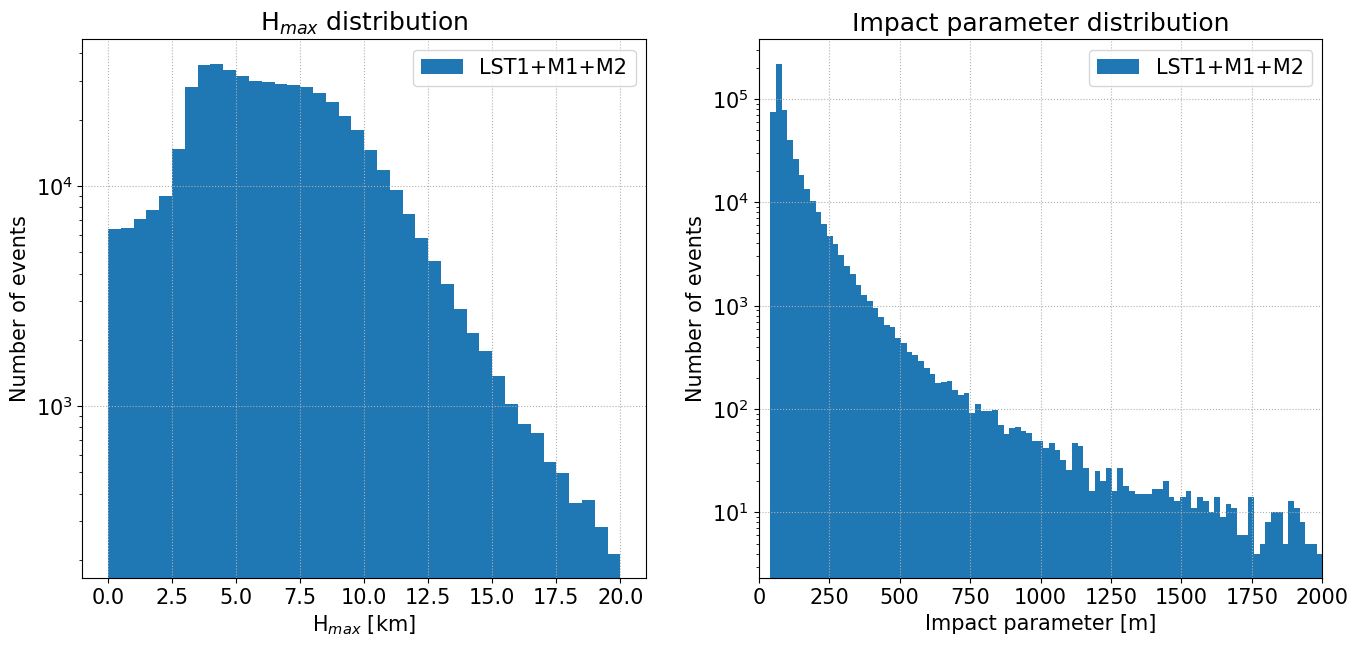

In [22]:
plt.figure(figsize=(16,7))


m2km = 1e-3
plt.subplot(121)
df = data.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).mean()

plt.hist(
    df['h_max'].to_numpy() * m2km, bins=np.linspace(0, 20, 41), label='LST1+M1+M2'
)
plt.title(f'H$_{{max}}$ distribution')
plt.xlabel(f'H$_{{max}}$ [km]')
plt.ylabel('Number of events')
plt.yscale('log')
plt.legend()
plt.grid()

plt.subplot(122)

df = data.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).mean()

plt.hist(
    df['impact'].to_numpy(), bins=np.linspace(0, 2000, 100), label='LST1+M1+M2'
)
plt.title(f'Impact parameter distribution')
plt.xlabel('Impact parameter [m]')
plt.ylabel('Number of events')
plt.xlim(0,2000)  
plt.yscale('log')
plt.legend()
plt.grid()

Extraction of the geometrical position of the telescopes in the simtel array system

In [23]:
geo_info = pd.read_hdf(output_file, key='configuration/instrument/subarray/layout')
geo_info

,tel_id,pos_x,pos_y,pos_z,name,type,camera_type,camera_index,optics_index,tel_description
0,1,-8.09,77.13,0.78,LST,LST,LSTCam,0,0,LST_LST_LSTCam
1,2,39.30,-62.55,-0.97,MAGIC,MAGIC,MAGICCam,1,1,MAGIC_MAGIC_MAGICCam
2,3,-31.21,-14.57,0.20,MAGIC,MAGIC,MAGICCam,1,1,MAGIC_MAGIC_MAGICCam


In [24]:
LST1_coords=[geo_info[geo_info.tel_id==1].pos_x,geo_info[geo_info.tel_id==1].pos_y]
MAGIC1_coords=[geo_info[geo_info.tel_id==2].pos_x,geo_info[geo_info.tel_id==2].pos_y]
MAGIC2_coords=[geo_info[geo_info.tel_id==3].pos_x,geo_info[geo_info.tel_id==3].pos_y]

# 6) Check the core position distribution

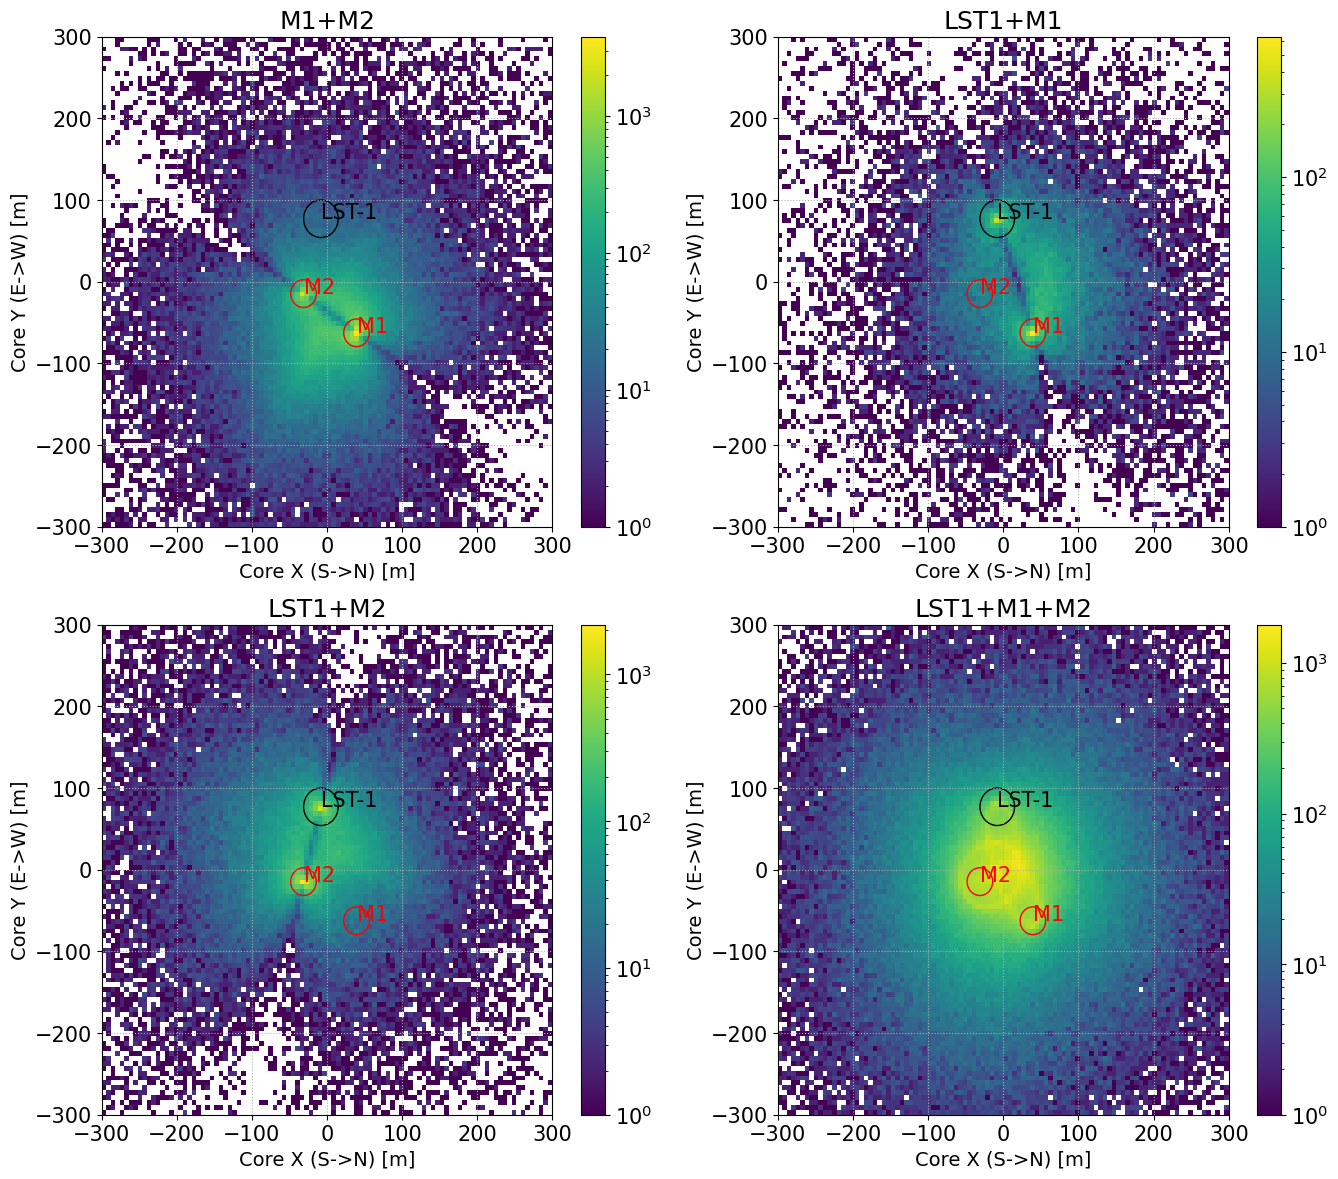

In [31]:
combo_names=['M1+M2','LST1+M1','LST1+M2','LST1+M1+M2']

plt.figure(figsize=(16,14))
plot_range=[-300,300]
for i,combo_name in enumerate(combo_names):
    a=221+i
    plt.subplot(a)
    plt.title(f'{combo_name}')

    ax = plt.gca()
    df = data.query(f'combo_type=={i}').groupby(['obs_id', 'event_id']).mean()

    plt.hist2d(
        df['core_x'].to_numpy(),
        df['core_y'].to_numpy(),
        range=[[plot_range[0],plot_range[1]], [plot_range[0],plot_range[1]]],
        bins=[100,100],norm='log')



    circle_1=plt.Circle([a for a in MAGIC1_coords],17,color='r', fill=False,label='M1')
    circle_2=plt.Circle([a for a in MAGIC2_coords],17,color='r', fill=False,label='M2')
    circle_L=plt.Circle([a for a in LST1_coords],23,color='black', fill=False,label='LST-1')
    ax.add_patch(circle_1)
    ax.add_patch(circle_2)
    ax.add_patch(circle_L)
    plt.text(MAGIC1_coords[0],MAGIC1_coords[1],s='M1',color='r')
    plt.text(MAGIC2_coords[0],MAGIC2_coords[1],s='M2',color='r')
    plt.text(LST1_coords[0],LST1_coords[1],s='LST-1',color='black')

    plt.xlabel('Core X (S->N) [m]',fontsize=14)
    plt.ylabel('Core Y (E->W) [m]',fontsize=14)
    plt.xlim(plot_range[0],plot_range[1])
    plt.ylim(plot_range[0],plot_range[1])
    plt.colorbar()
    plt.grid()


